# Phylogenetic tree exploration and visualization made easy with ETE

### What's ETE ??
"A Python **E**nvironment for **T**ree **E**xploration"

Consistent framework to :
    - read, manipulate and annotate Trees
    - visualize
    - implement custom algorithms that use tree
Assists in the automated manipulation, analysis and visualization of any type of hierarchical trees
    - phylogenetics | clustering

### Why ETE  ??

**ape**, **picante**, etc in R

* A tool to Annotate and Visualise Tree in __python__ (yeahhhh !!!)

    - Bio.Phylo is limited
    - dendropy don't do visualisation 
    - etc

* Make editors accept your paper  (purely based on the fanciness of your images)




###  Today's plan

- Introduction to the API (reading, writing, traversing a tree, adding features, etc)
- 3 basic examples of what you can do with the vizualisation tools


## Part 1 : Quick introduction to the API

In [11]:
import ete3
import inspect
print([x[0] for x in inspect.getmembers(ete3, inspect.isclass) if 'Face' not in x[0]])


['ArrayTable', 'ClusterNode', 'ClusterTree', 'EvolNode', 'EvolTree', 'NCBITaxa', 'Nexml', 'NexmlTree', 'NodeStyle', 'PhyloNode', 'PhyloTree', 'Phyloxml', 'PhyloxmlTree', 'SeqGroup', 'Tree', 'TreeNode', 'TreeStyle', 'WebTreeApplication', 'map', 'range']


## Tree representation in ete

    - A tree is a Node ===> the root is a node, so are all the others nodes.
    
    - Each node of the tree is either an "internal node" | "root" or a "leaf"

In [12]:
# ETE read tree from a str or a file
from ete3 import Tree

rand_newick = "((((a,b), c), d), (e,f));"
rand_tree = "rand_tree"
with open(rand_tree, 'w') as TREE:
    TREE.write(rand_newick)

# Reading tree
t1 = Tree(rand_newick)
t2 = Tree(rand_tree)


In [13]:
# Print t1 then t2 in ASCII
# FILL HERE

In [14]:
# Traverse tree t1 and add a feature at internal_node
from numpy import random

# Traverse : levelorder, preorder, postorder
for node in t1.traverse("levelorder"):
    if not node.is_leaf():
        # add a features : randomness
        node_rand = random.randint(10)
        # FILL CODE
        node.add_features(randomness=node_rand)
            

In [15]:
# print t1 again with features : name and randomness
# FILL CODE
print(t1.get_ascii(show_internal=True, attributes=['name', 'randomness']))


            /-a
         /, 1
      /, 5  \-b
     |  |
   /, 4  \-c
  |  |
-, 2  \-d
  |
  |   /-e
   \, 4
      \-f


In [16]:
# iter over leaf and access name
for node in t1:
    # t1.iter_leaves()
    print(node.name)


a
b
c
d
e
f


In [17]:
# search by features
print(t1.search_nodes(randomness=5))
print(t1.search_nodes(name='a'))

# shortcut
t1&'a'

[Tree node '' (0x7efbd13d0f6)]
[Tree node 'a' (0x7efbd13d0e8)]


Tree node 'a' (0x7efbd13d0e8)

In [18]:
print(t1)
# get sister node
sister = (t1&'a').get_sisters()
print("\nSISTER a : ")
print(sister)



            /-a
         /-|
      /-|   \-b
     |  |
   /-|   \-c
  |  |
--|   \-d
  |
  |   /-e
   \-|
      \-f

SISTER a : 
[Tree node 'b' (-0x7ffff81042ec2f0e)]


In [19]:
print(t1)
# Get LCA of multiple node
lca = t1.get_common_ancestor(['a', 'b'])
print("\n\nLCA (a, b) : ")
print(lca)



            /-a
         /-|
      /-|   \-b
     |  |
   /-|   \-c
  |  |
--|   \-d
  |
  |   /-e
   \-|
      \-f


LCA (a, b) : 

   /-a
--|
   \-b


In [20]:
print(t1)
# get children
root_children = t1.get_children()
print("\n\nFIRST CHILD OF ROOT")
print(root_children[0])



            /-a
         /-|
      /-|   \-b
     |  |
   /-|   \-c
  |  |
--|   \-d
  |
  |   /-e
   \-|
      \-f


FIRST CHILD OF ROOT

         /-a
      /-|
   /-|   \-b
  |  |
--|   \-c
  |
   \-d


In [21]:
# RF distance
# t1 and t2 were the same tree ... 
# Recal t1 and t2 are the same tree
rf = t1.robinson_foulds(t2)
print("\n\nRF DISTANCE between t1 and t2 :")
print(rf[0])



RF DISTANCE between t1 and t2 :
0


In [22]:
# prune tree to list of leaf:
leaf_to_keep = ['a', 'c', 'd', 'f']
print("\n\nPRUNE t1 to [%s]"%", ".join(leaf_to_keep))
print("\n\nBEFORE PRUNING : ")
print(t1)
# FILL CODE
t1.prune(leaf_to_keep)

print("\n\nAFTER PRUNING : ")
print(t1)



PRUNE t1 to [a, c, d, f]


BEFORE PRUNING : 

            /-a
         /-|
      /-|   \-b
     |  |
   /-|   \-c
  |  |
--|   \-d
  |
  |   /-e
   \-|
      \-f


AFTER PRUNING : 

         /-c
      /-|
   /-|   \-a
  |  |
--|   \-d
  |
   \-f


## PART 2 : Visualization

#### First  Exercice : simple tree visualization

Data : a random tree with random branches

- Tree rendering
- Tree style


In [23]:
t = Tree()
leave_names = ["Spec_"+x for x in list("ABCDEFGHIJ")]

# Generate a random tree with leaf name defined by leave_names
t.populate(8, names_library=leave_names, random_branches=True)

print(t.get_ascii(attributes=['name', 'support'], show_internal=True))



                                            /-Spec_F, 0.5863992251855649
                         /, 0.515598957325863
                        |                   \-Spec_E, 0.07997406564804377
                        |
     /, 0.3765376414684153                                       /-Spec_D, 0.12360744734631923
    |                   |                     /, 0.637106223815485
    |                   |                    |                   \-Spec_C, 0.36249405416529956
    |                    \, 0.31923093127179003
-, 1.0                                       |                    /-Spec_J, 0.6606178106939081
    |                                         \, 0.4080858466375832
    |                                                             \-Spec_I, 0.6531892784233982
    |
    |                     /-Spec_H, 0.545709419043339
     \, 0.18321116991400777
                          \-Spec_G, 0.2372461704543738


In [34]:
# show tree in a gui
t.show()

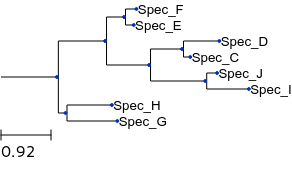

In [25]:
# render tree (supported format : png, pdf and svg)
t.render('tree.png', dpi=200)

# render and show directly in the notebook
t.render('%%inline', dpi=200)

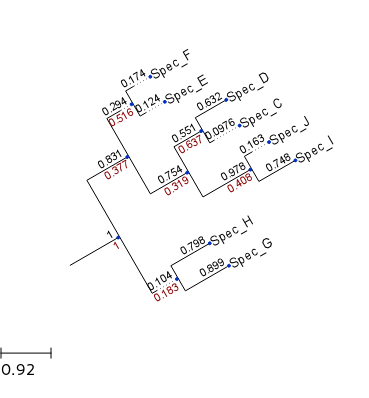

In [26]:
# TreeStyle to change the display option

from ete3 import TreeStyle
ts = TreeStyle()
ts.show_branch_length = True
ts.show_branch_support = True

# rotate  tree
ts.rotation = -30
t.render('%%inline', tree_style=ts)

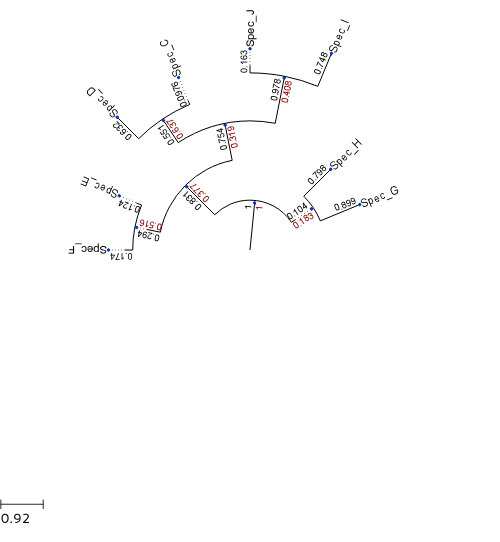

In [27]:
# Draw a circular tree

ts.mode = "c" #circular mode (default = 'r' for rectangular ?)
ts.rotation = 0
ts.arc_start = -180 # 0 degrees = 3 o'clock
ts.arc_span = 180
t.render('%%inline', tree_style=ts, w=500)

['AttrFace', 'BarChartFace', 'CircleFace', 'DynamicItemFace', 'Face', 'ImgFace', 'OLD_SequenceFace', 'PieChartFace', 'ProfileFace', 'RandomFace', 'RectFace', 'SeqMotifFace', 'SequenceFace', 'SequencePlotFace', 'StackedBarFace', 'StaticItemFace', 'TextFace', 'TreeFace']


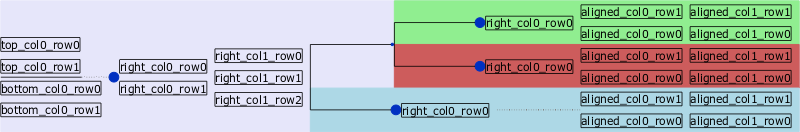

In [28]:
# Adding face to Tree

from ete3 import faces
from IPython.display import Image

print([f for f in dir(faces) if 'Face' in f])

Image('face_positions.png')


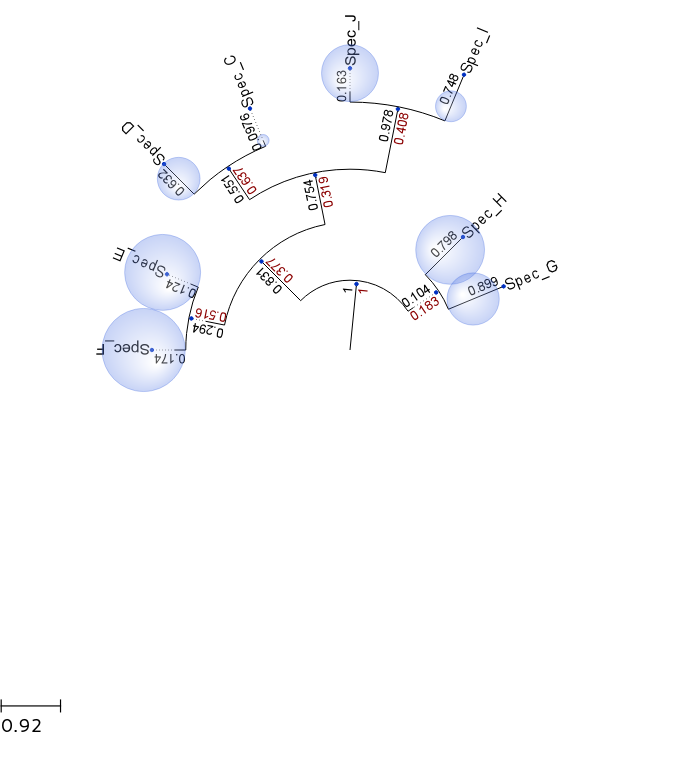

In [29]:
# Adding a Circleface to our current tree

def layout(node):
    if node.is_leaf():
     
        # Create a sphere face with a random size
        C = faces.CircleFace(radius=random.randint(5, 50), color="RoyalBlue", style="sphere")
        
        # Make it transparent 
        C.opacity = 0.3
       
        # And place as a float face over the tree
        faces.add_face_to_node(C, node, 0, position="float")

# link out layout to the style
ts.layout_fn = layout

#show
t.render('%%inline', tree_style=ts, w=700)

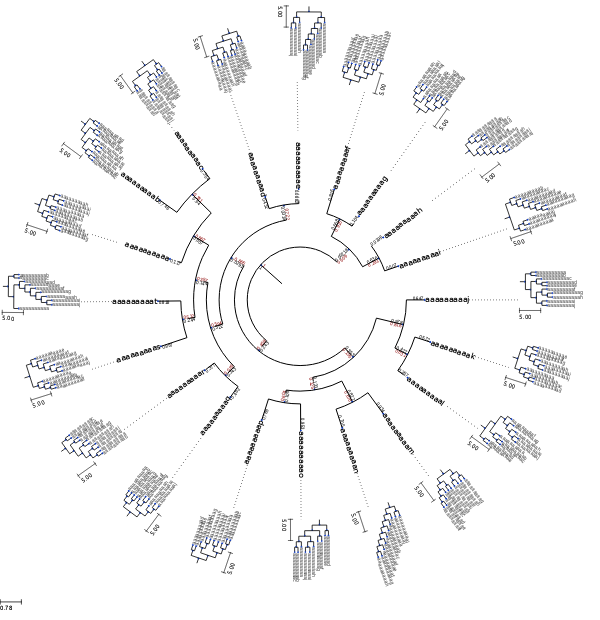

In [30]:
# With Face, You can actually make things like this : (treeception)
Image('tree_faces.png')

#### Second  Exercice : Duplication|Loss history of a gene familly

Data : genetree newick where I already add a feature (**state**), where :

- state = 1 ==> internal node with duplication
- state = 0 ==> speciation node


In [31]:
from ete3 import Tree
t = Tree('annoted_trees', format=2)
print(t.get_ascii(show_internal=True, attributes=['name', 'states']))


      /-Dre_1, 0
   /, 0
  |  |   /-Cfa_1, 0
  |   \, 0
-, 1     \-Hsa_1, 0
  |
  |   /-Dre_2, 0
   \, 0
      \-Cfa_2, 0


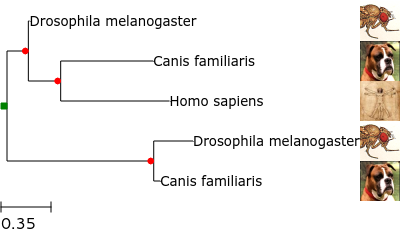

In [32]:
from ete3 import Tree, faces, TreeStyle
import utils

# Create a faces ready to read the name attribute of nodes
# Creates a layout function
def mylayout(node):
    # If node is a leaf, add the nodes name and its scientific
    # name
    if node.is_leaf():
       
        # add a face for scientific name
        longNameFace = faces.TextFace(utils.get_scientific_name(node))
        faces.add_face_to_node(longNameFace, node, column=1)

        # Sets the style of leaf nodes
        node.img_style["size"] = 0
        image = utils.get_image(node.name)
        faces.add_face_to_node(faces.ImgFace(image), node, column=0, aligned=True)
    
    #If node is an internal node
    elif int(node.states) == 1:
        # Sets the style of internal nodes
        node.img_style["size"] = 6
        node.img_style["shape"] = "square"
        node.img_style["fgcolor"] = "green"
    else :
        # Sets the style of internal nodes
        node.img_style["size"] = 6
        node.img_style["shape"] = "circle"
        node.img_style["fgcolor"] = "red"
        


# And, finally, Visualize the tree using my own layout function
ts = TreeStyle()
ts.show_leaf_name = False
ts.layout_fn = mylayout
t.render("%%inline", dpi=600, tree_style = ts)



#### Third  Exercice : Phylogenetic tree, sequence and information content

Data : 
    - An alignment
    - A tree constructed using that alignment
    (Actually those two were randomly generated)


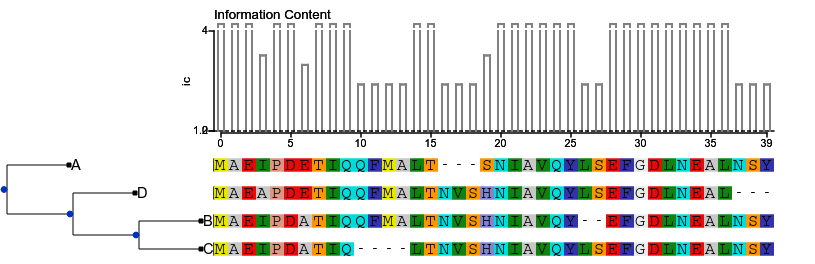

In [33]:
from ete3 import PhyloNode, SequenceFace, faces
from Bio import AlignIO
from Bio import Alphabet
from Bio.Align import AlignInfo

alignement = "alignement.fasta"

# Open tree and link alignement to it
t = PhyloNode("phylotree.nw")
t.link_to_alignment(alignement)

# Compute Information content with Biopython
align = AlignIO.read(alignement, 'fasta', alphabet=Alphabet.Gapped(Alphabet.IUPAC.protein))
summary_info = AlignInfo.SummaryInfo(align)        
total_ic_content = summary_info.information_content()
ic_content = summary_info.ic_vector.values()

# Set TreeStyle
ts = TreeStyle()
ts.branch_vertical_margin = 10
ts.allow_face_overlap = False
ts.show_scale = False
ts.show_leaf_name = False

# Align ic plot to TreeStyle header
ic_plot = faces.SequencePlotFace(ic_content, fsize=10, col_width=14, header="Information Content", kind='bar', ylabel="ic")
ts.aligned_header.add_face(ic_plot, 1) 

#t.add_face(ic_plot,1)
t.render("%%inline", tree_style=ts, dpi=300)